# 01_NatureBarValues Exercise Solutions

Solutions for exercises scattered through
[01_NatureBarValues](01_NatureBarValues.ipynb) notebook.

In [1]:
import pandas as pd
import altair as alt

In [3]:
df_orig = pd.read_csv('data/NatureBarValues.csv')
df = df_orig.melt(id_vars=["Item"], var_name="Category")
df.head(7)

,Item,Category,value
0,Item 1,Category 1,6
1,Item 2,Category 1,8
2,Item 3,Category 1,10
3,Item 4,Category 1,20
4,Item 5,Category 1,23
5,Item 1,Category 2,29
6,Item 2,Category 2,27


---

## EXERCISE 1

Before we proceed, try making a similar stacked bar chart, but this time with 

- a bar for each category (along the bottom), 
- each bar representing the sum of the values within the category, and 
- a differnt color for each item.

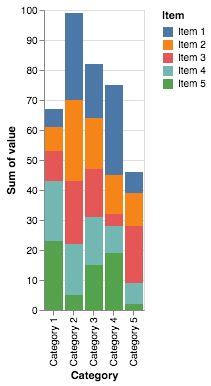

In [14]:
alt.Chart(df).mark_bar().encode(
    x = 'Category:N',
    y = 'sum(value):Q',
    color = 'Item:N'
)

---

## EXERCISE 2

Layer (superimpose) two visualizations:

1. Vertical bar chart showing
    - Categories across the horizontal (bottom) axis
    - mean value (across all the Items) going up the vertical axis (bar height)
    - `color = alt.value('lightgray')`
1. Point plot of all individual values
    - Categories again along the horizontal axis
    - values up the vertical axis
    - color by Category
    
*Point plot should be on top of the bar chart!*

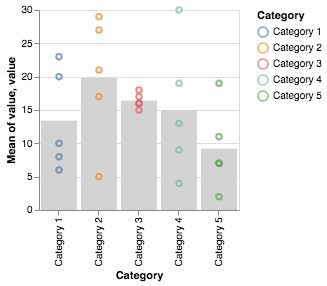

In [11]:
base_plot = alt.Chart(df).encode(
    x = 'Category:N'
).properties(
    width = 200,
    height = 200
)

point = base_plot.mark_point().encode(
    y = 'value:Q',
    color = 'Category:N'
)

bar = base_plot.mark_bar().encode(
    y = 'mean(value):Q',
    color = alt.value('lightgray')
)

bar + point